In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()
df["Annual Income (k$)"]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

## Visualising DataSet 

In [ ]:
gender_counts= df["Gender"].value_counts()
gender_counts.index

Index(['Female', 'Male'], dtype='object', name='Gender')

In [ ]:
gender =df["Gender"]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 2 artists>

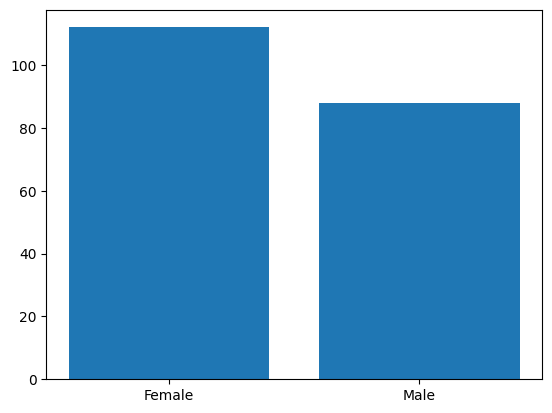

In [ ]:
plt.bar(gender_counts.index, gender_counts)

In [ ]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

(array([62., 67., 43., 28.]),
 array([18., 31., 44., 57., 70.]),
 <BarContainer object of 4 artists>)

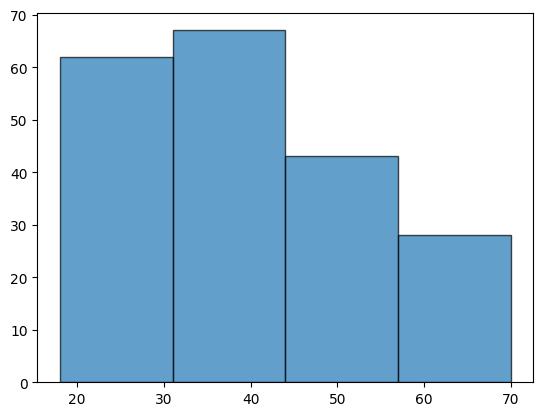

In [ ]:
plt.hist(df["Age"],bins=4,edgecolor="black" , alpha=0.7)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  8.,  0.,
         0.,  0.,  5.,  0.,  8.,  0.,  6.,  0.,  4.,  0., 11.,  0.,  0.,
         0.,  4.,  0.,  5.,  0., 26.,  0.,  0.,  0.,  3.,  0., 20.,  0.,
         3.,  0.,  6.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  8.,  0.,  2.,
         0.,  0.,  0.,  3.,  0.,  5.,  0.,  0.,  0.,  3.,  0.,  6.,  0.,
         0.,  0.,  0.,  0.,  5.,  0.,  7.,  0., 11.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  2.,  0.,  2.,  0.,
         4.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,
         4.,  0.,  0.,  0.,  7.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

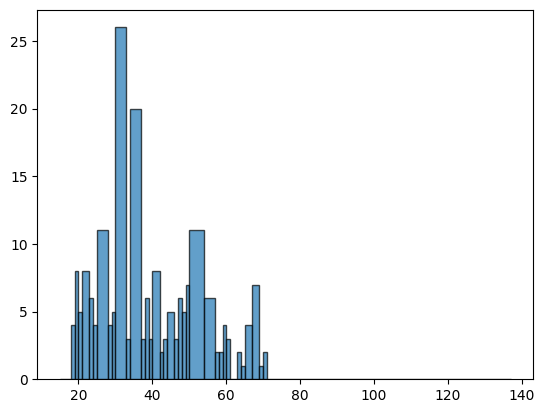

In [ ]:
plt.hist(df["Age"],df["Annual Income (k$)"],edgecolor="black", alpha=0.7)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## label encoding for gender

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_en = LabelEncoder()

In [ ]:
df["Gender"] = label_en.fit_transform(df["Gender"])

In [ ]:
df["Gender"].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

## Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
features = df["annu

In [ ]:
scaled_data = scaler.fit_transform(df.drop("CustomerID",axis=1))

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns = df.columns.drop("CustomerID"))

In [ ]:
scaled_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


## Making CLusters 

In [ ]:
from sklearn.cluster import KMeans

### elbow method

In [ ]:
wcss= []
for i in range(1,len(df)):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit()
    wcss.append(kmeans.inertia_)
    

# wcss

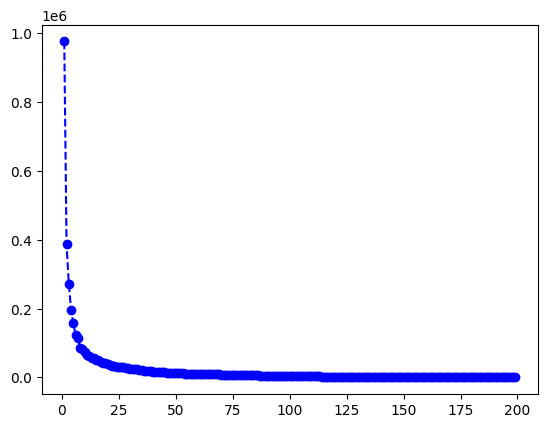

In [ ]:
plt.plot(range(1,len(df)),wcss,"bo--")

In [ ]:
## hence the k value should be 25 


In [ ]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [ ]:
df["cluster"] = kmeans.fit_predict(df)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,1
198,199,1,32,137,18,1


Text(0, 0.5, 'Spending Score')

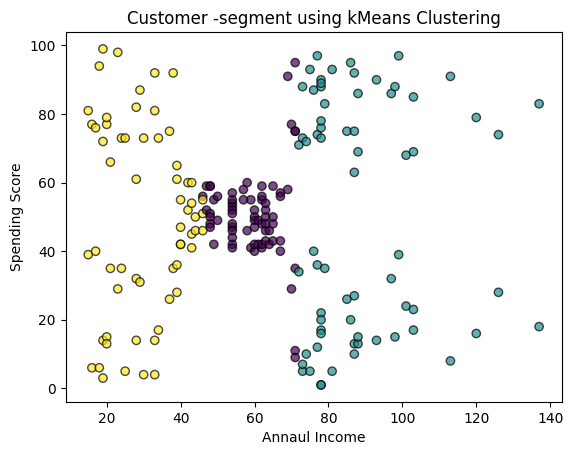

In [ ]:
plt.scatter(df["Annual Income (k$)"] , df["Spending Score (1-100)"] , c=df["cluster"],cmap="viridis" , edgecolor="black", alpha=0.7)
plt.title("Customer -segment using kMeans Clustering")
plt.xlabel("Annaul Income")
plt.ylabel("Spending Score")